<a href="https://colab.research.google.com/github/rajivsresearch/Corona/blob/master/Where_is_the_market_headed_in_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 11.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=62acfee6a3ca6857bee356c1641d63a3f6daf97169c9473a17b91955b005d574
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px

In [6]:
# Get stock data from Yahoo Finance

def GetStockData(tickerSymbol, start, end):
  #get data on this ticker
  tickerData = yf.Ticker(tickerSymbol)

  #get the historical prices for this ticker
  tickerDf = tickerData.history(period='1d', start=start, end=end)

  #see your data
  return tickerDf[['Close']]

In [7]:
sp = GetStockData('^GSPC', '1921-01-01', '2020-12-31')

In [8]:
sp.head()

,Close
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000


In [9]:
years = np.arange(1927,2021,1)

In [10]:
years

array([1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020])

In [11]:
# Get returns if stock purchased on a given date
# dataframe should contain Date and Close price for the year

def getreturns(df, buydate):
  f1 = df['Date'] == buydate
  buyprice = df.loc[f1, 'Close'].values

  f2 = df['Date'] > buydate
  return (df.loc[f2,'Close'] - buyprice)/buyprice*100

In [12]:
# Get returns for all the years i.e. if stock purchased on each day, what would be the return for the rest of the days in the year?
# Returns a dictionary of dataframes with key=year
# Buy date is Column, Sell Date is index, value is the percent return

ret={}

for year in years:
  #print(year)
  df = sp.loc[sp.index.year==year,:].reset_index()
  
  for date in df['Date']:
    df[date] = getreturns(df, date)

  ret[year] = df

In [37]:
def GetRMSE(year):
  bins = np.arange(-100, 110, 10)
  a1 = np.histogram(ret[2020].iloc[:,2:].values.flatten(), bins=bins)[0]
  a2 = np.histogram(ret[year].iloc[:,2:].values.flatten(), bins=bins)[0]
  return np.sqrt(np.mean((a1-a2)**2))

In [73]:
def compare_years(year1, year2, save='n'):
  bins = np.linspace(-100, 100, 100)
  plt.hist(ret[year1].iloc[:,2:].values.flatten(), bins, alpha=0.5, label=str(year1))
  plt.hist(ret[year2].iloc[:,2:].values.flatten(), bins, alpha=0.5, label=str(year2))
  plt.legend(loc='upper right')

  labels = range(0,11000,1000)
  plt.yticks(labels, labels)
  if save=='y':
    plt.savefig(str(year)+'.png')
  plt.show()

In [ ]:
rmse = pd.DataFrame(index=years)
for year in years:
  rmse.loc[year,'RMSE'] = GetRMSE(year)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6630: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6631: RuntimeWarning:

All-NaN slice encountered



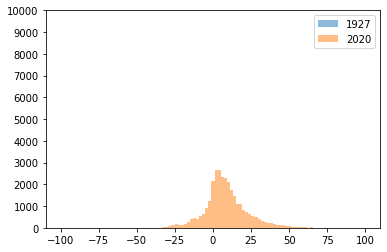

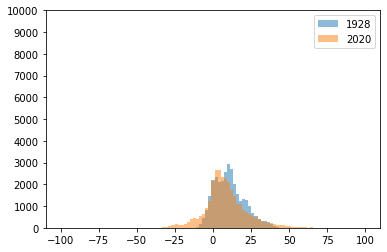

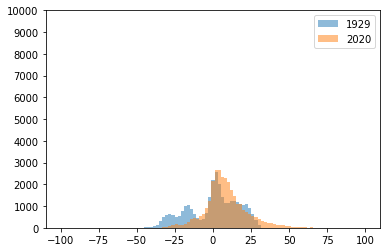

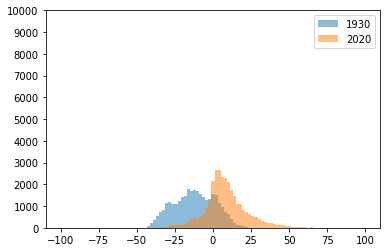

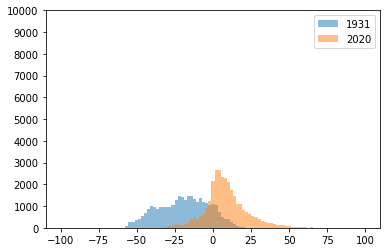

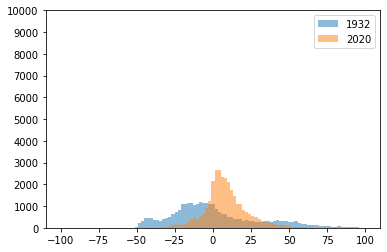

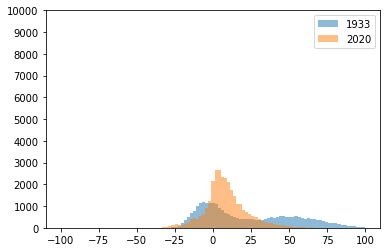

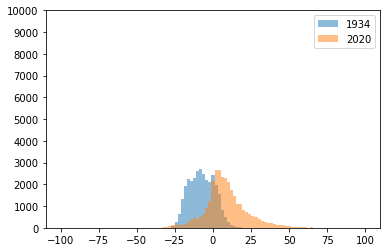

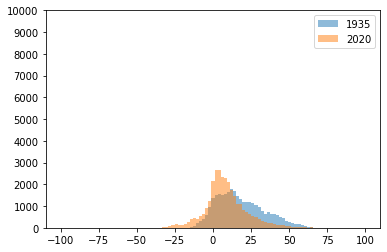

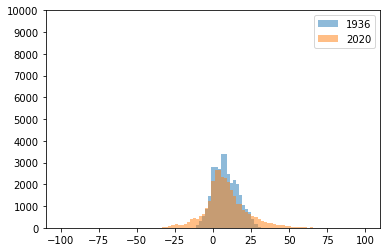

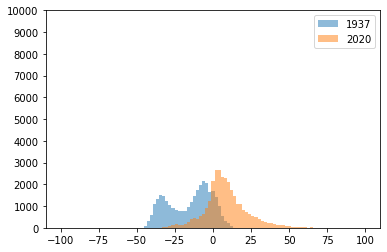

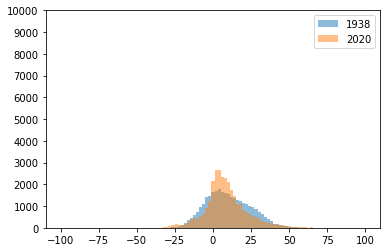

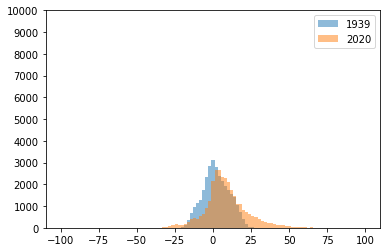

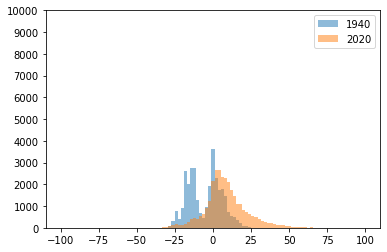

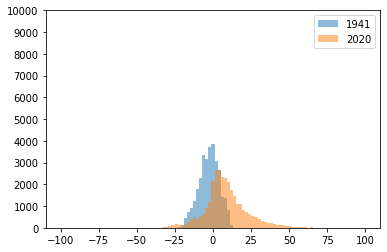

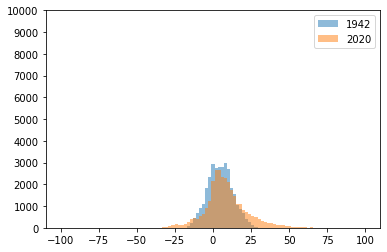

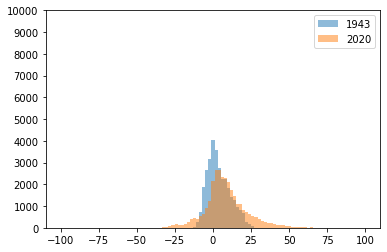

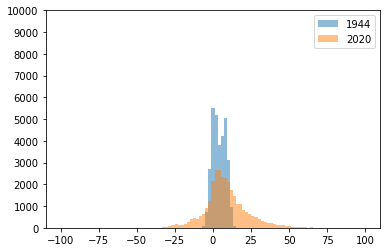

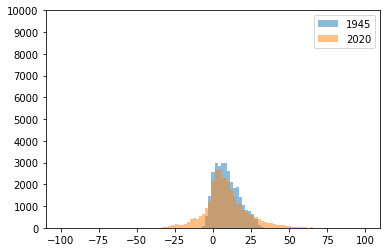

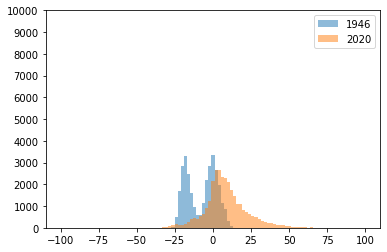

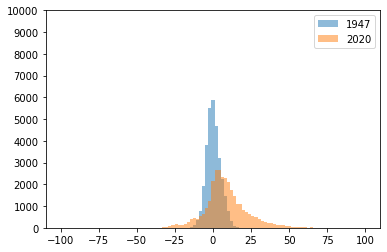

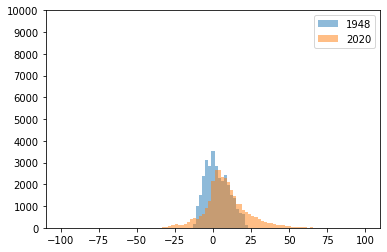

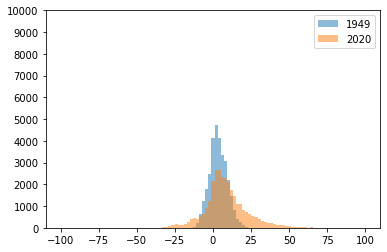

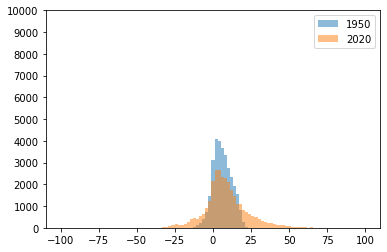

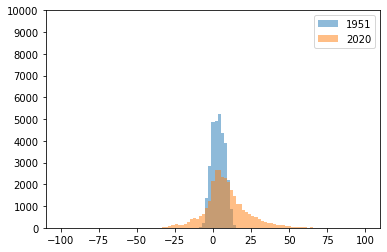

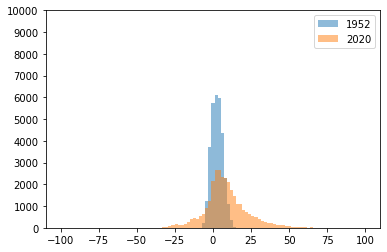

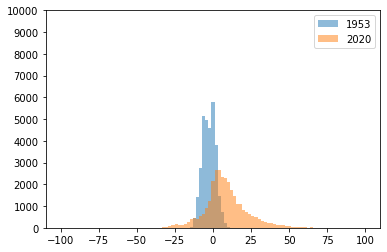

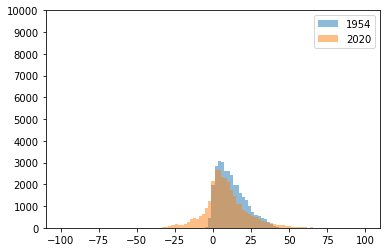

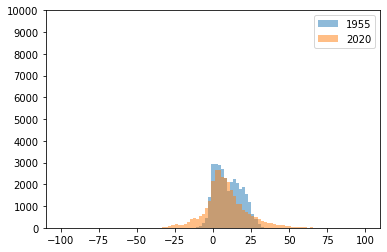

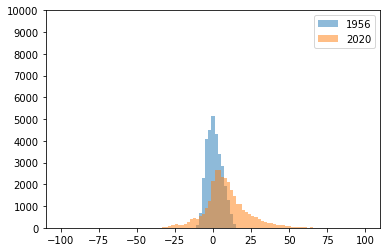

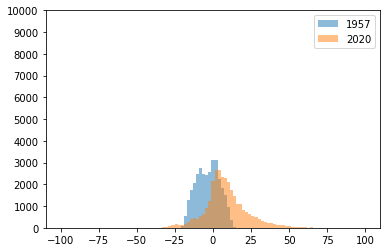

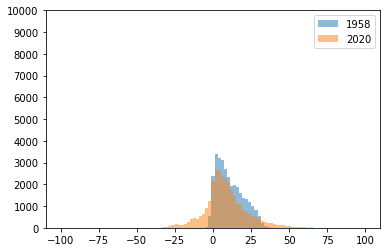

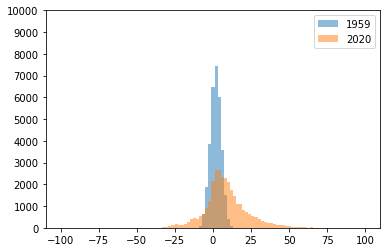

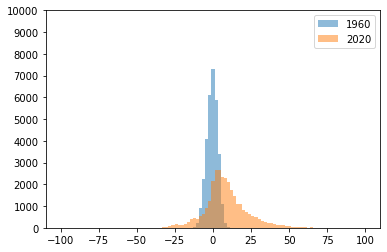

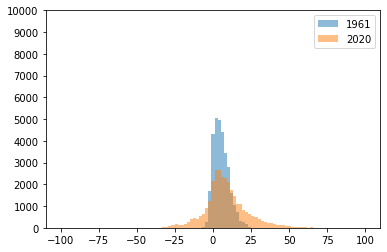

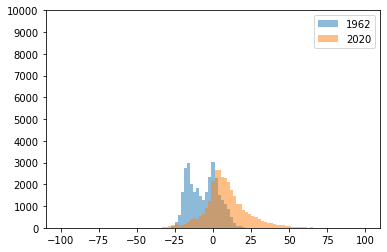

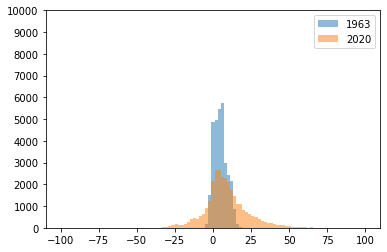

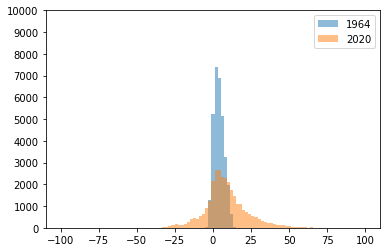

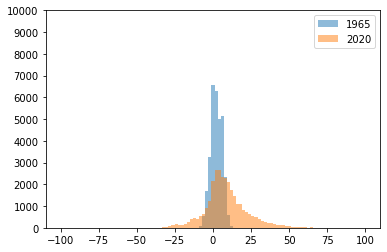

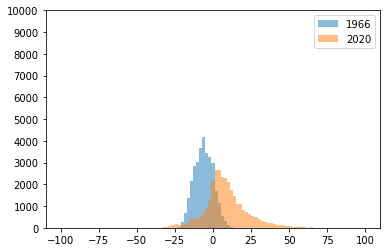

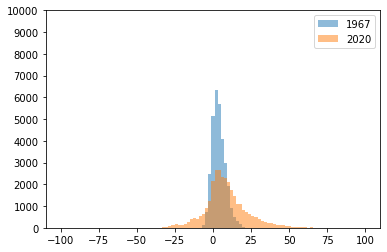

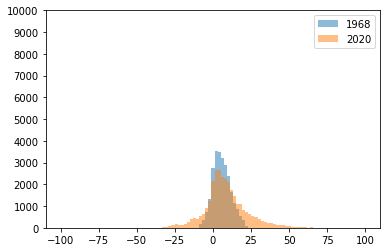

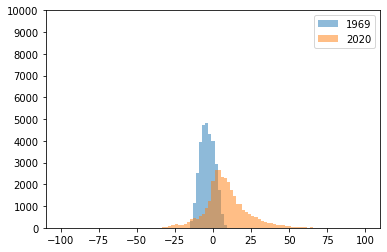

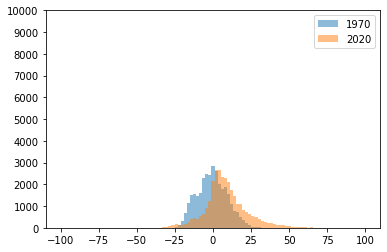

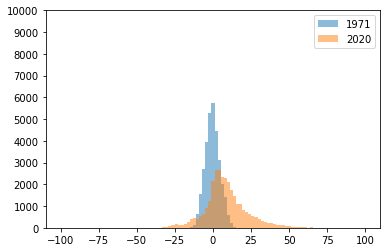

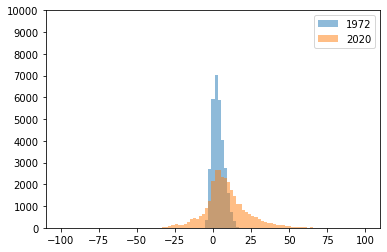

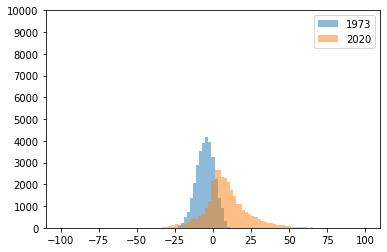

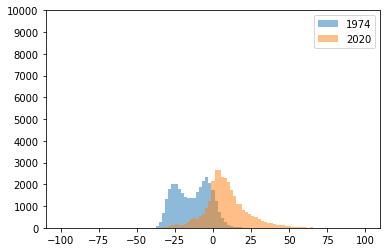

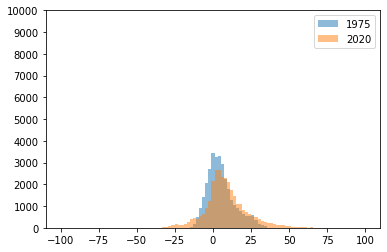

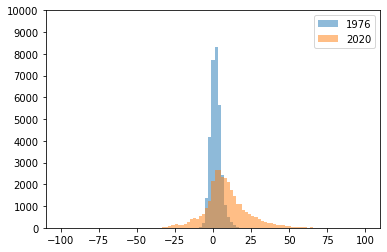

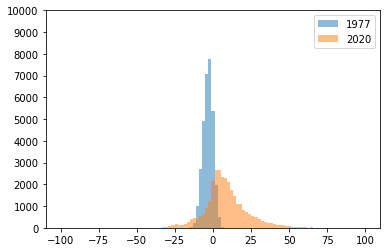

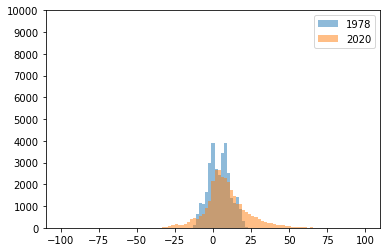

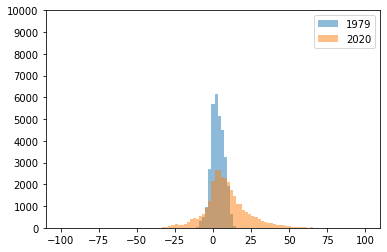

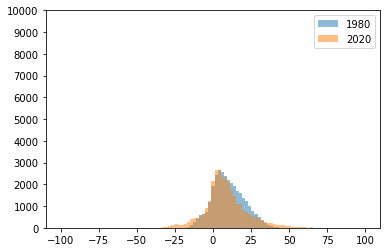

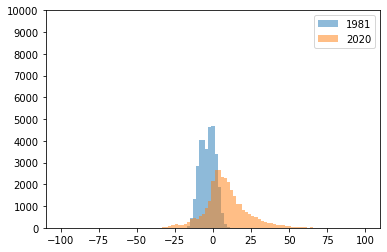

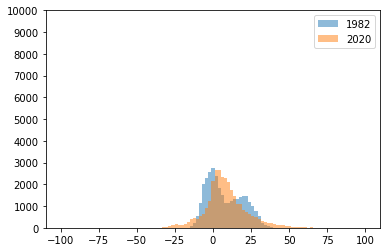

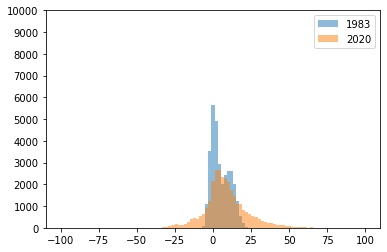

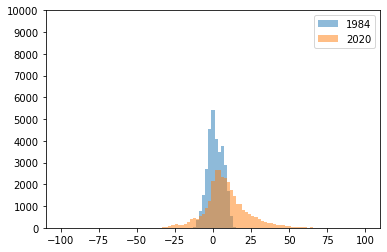

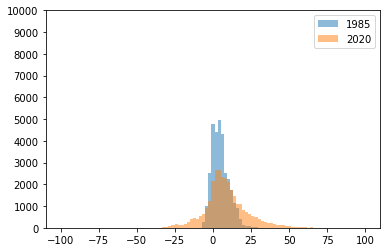

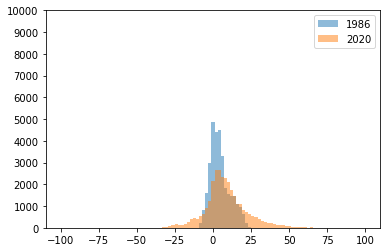

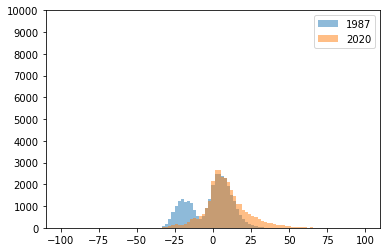

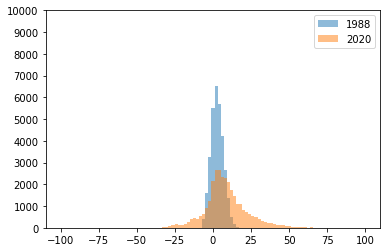

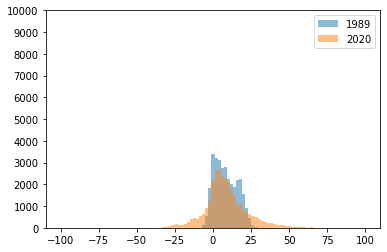

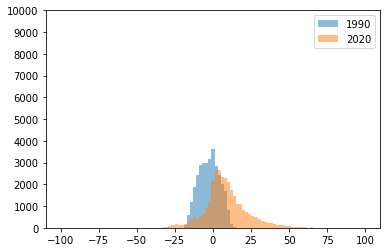

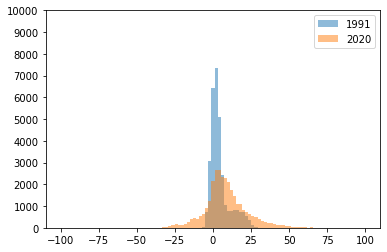

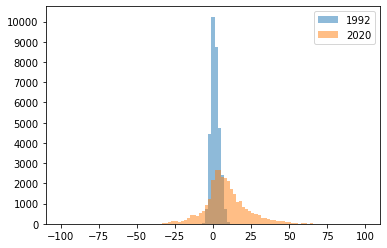

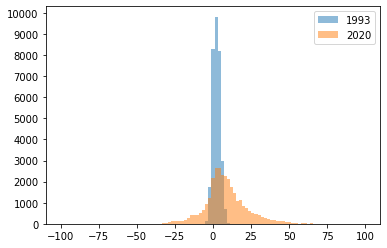

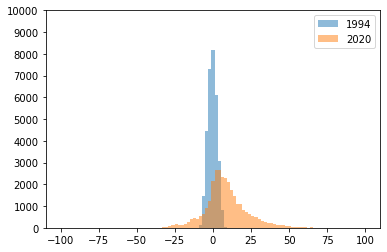

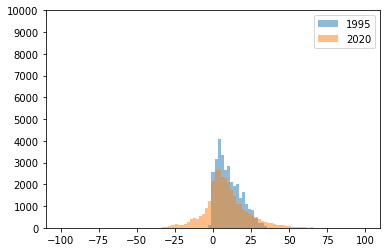

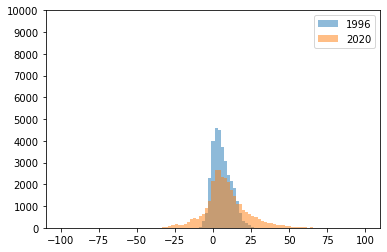

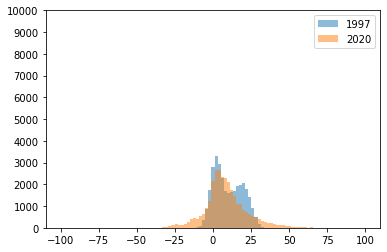

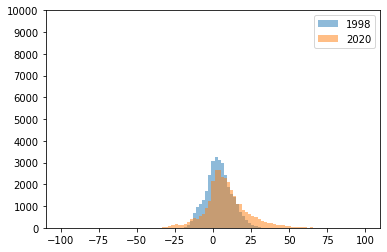

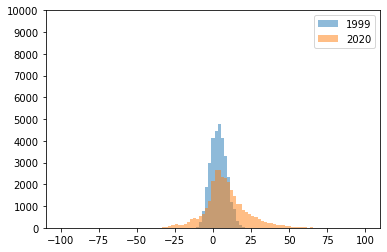

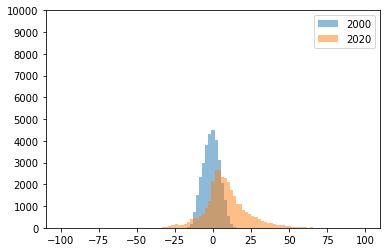

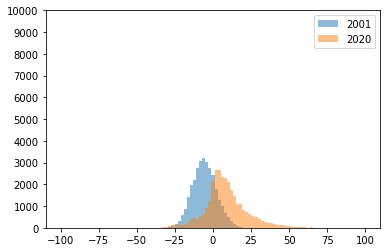

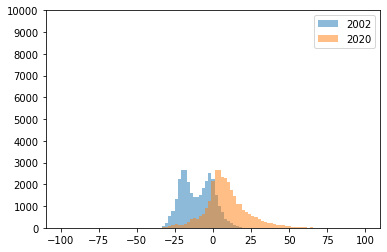

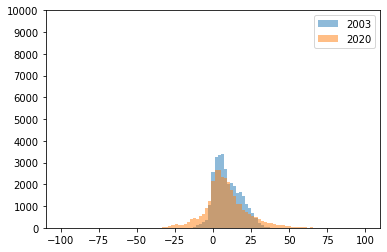

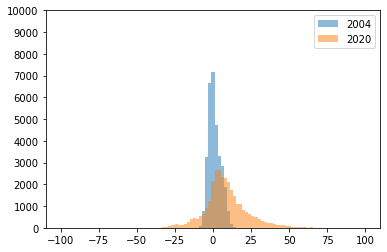

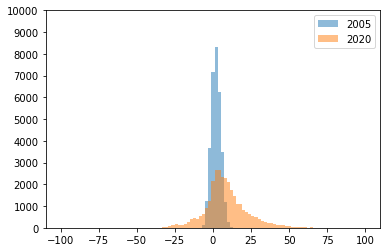

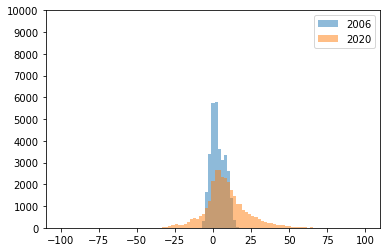

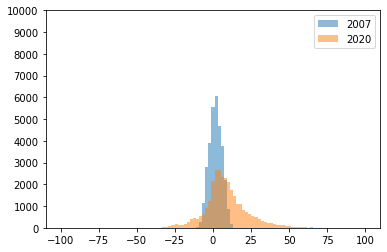

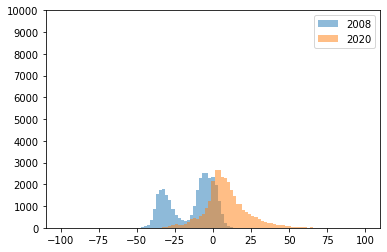

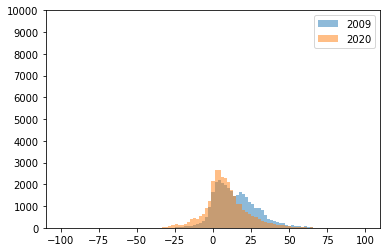

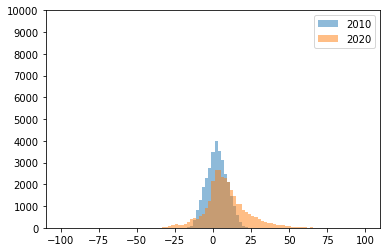

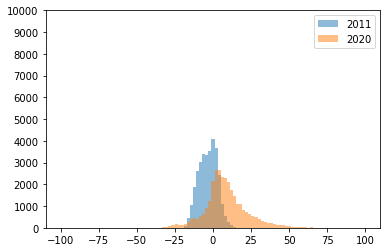

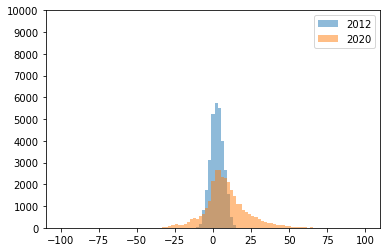

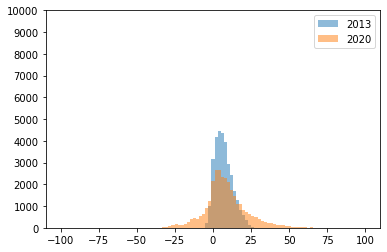

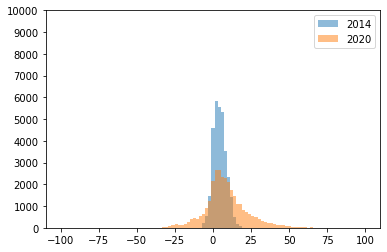

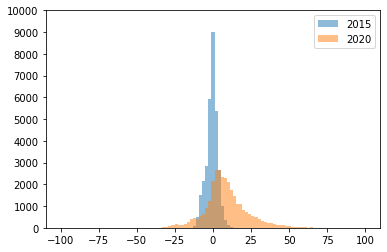

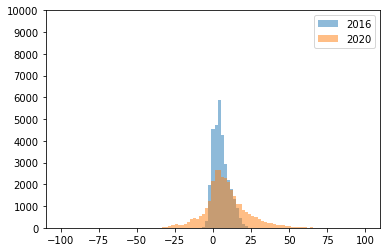

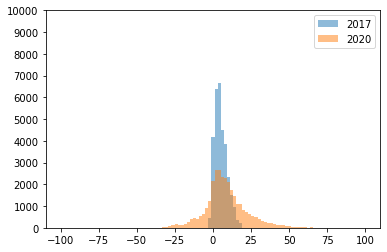

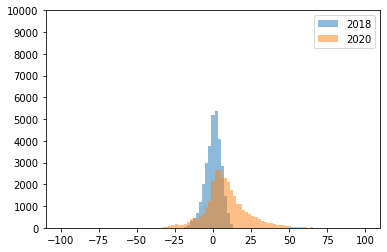

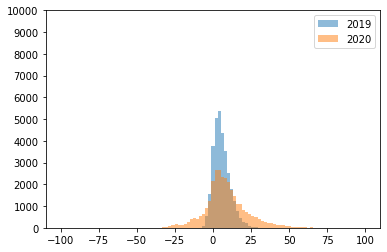

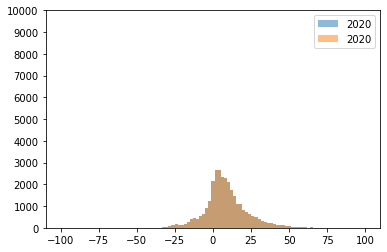

In [74]:
for year in years:
  compare_years(year, 2020,'y')

In [85]:
!pwd

/content


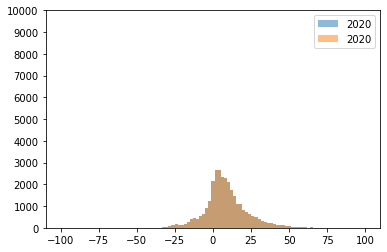

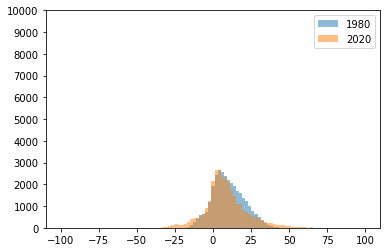

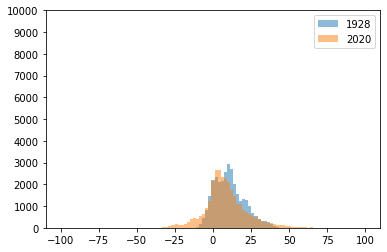

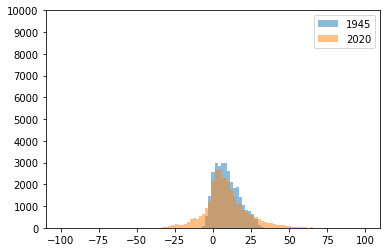

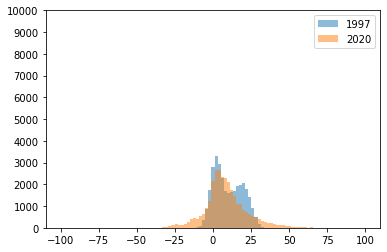

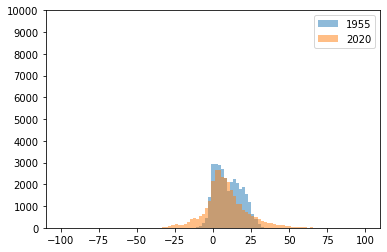

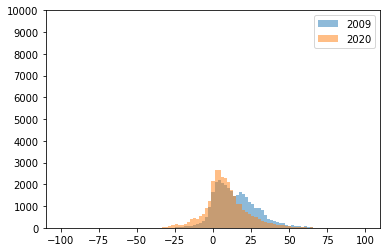

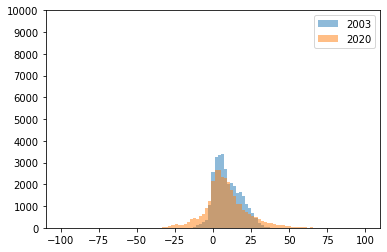

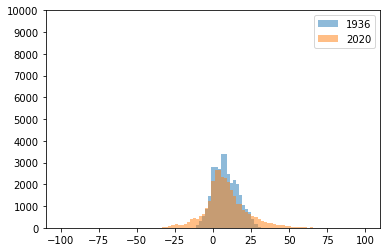

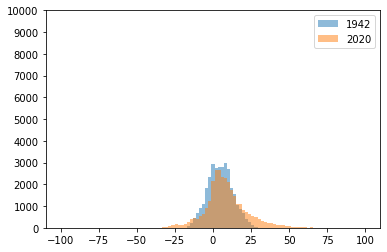

In [54]:
for year in rmse.sort_values(by='RMSE').head(10).index.values:
  compare_years(year, 2020)

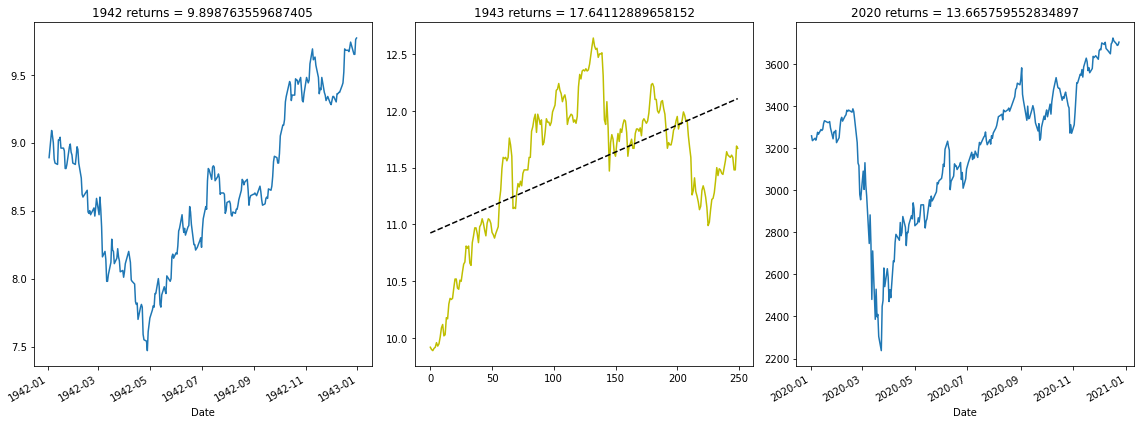

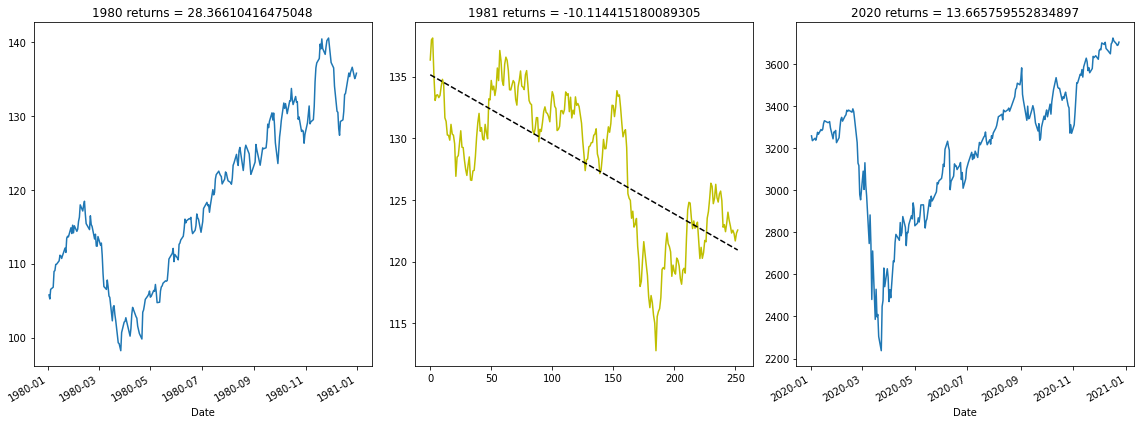

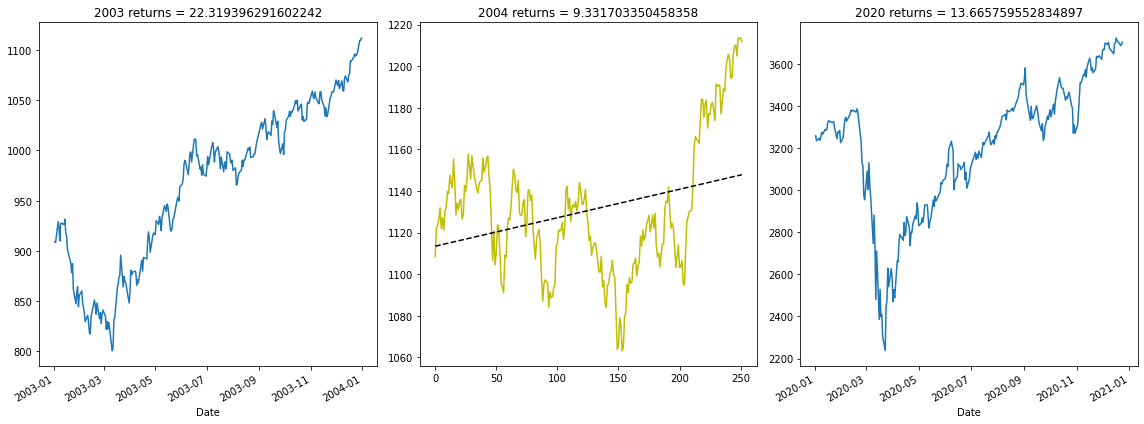

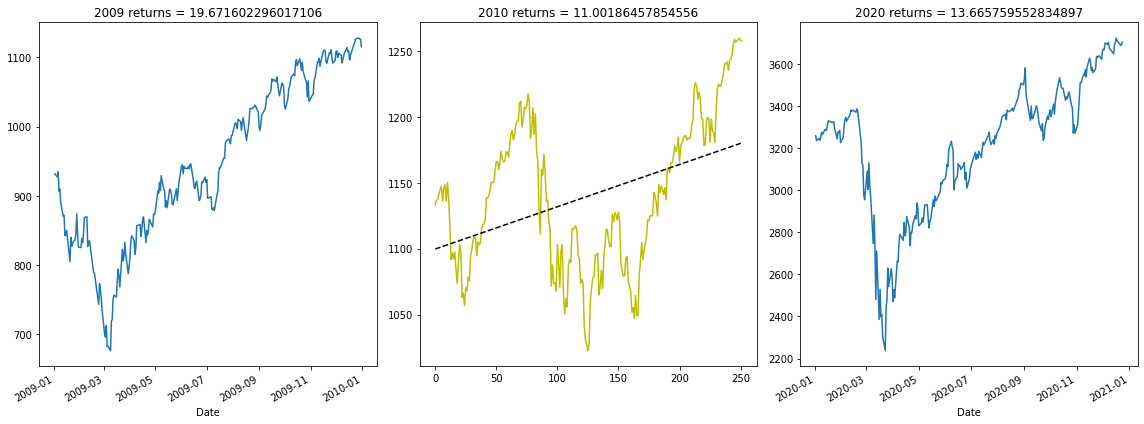

In [87]:
#for year in rmse.sort_values(by='RMSE').head(10).index.values:
for year in [1942, 1980, 2003, 2009]:
  
  plt.subplots(1,2, figsize=(16,6))
  plt.subplot(1,3,1)
  sp.loc[sp.index.year == year, 'Close'].plot()
  r1 = -(sp.loc[sp.index.year == year, 'Close'][0] - sp.loc[sp.index.year == year, 'Close'][-1])/sp.loc[sp.index.year == year, 
                                                                                                       'Close'][0]*100
  plt.title(str(year) + ' returns = ' + str(r1))

  plt.subplot(1,3,2)
  data = sp.loc[sp.index.year == year+1, 'Close']
  #data.plot()

  x = np.arange(0,len(data))
  y = data.values

  coef = np.polyfit(x,y,1)
  poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y

  plt.plot(x,y, 'y-', x, poly1d_fn(x), '--k')
  r2 = -(sp.loc[sp.index.year == year+1, 'Close'][0] - sp.loc[sp.index.year == year+1, 'Close'][-1])/sp.loc[sp.index.year == year+1, 
                                                                                                           'Close'][0]*100
  plt.title(str(year+1) + ' returns = ' + str(r2))

  plt.subplot(1,3,3)
  sp.loc[sp.index.year == 2020, 'Close'].plot()
  r3 = -(sp.loc[sp.index.year == 2020, 'Close'][0] - sp.loc[sp.index.year == 2020, 'Close'][-1])/sp.loc[sp.index.year == 2020, 
                                                                                                           'Close'][0]*100
  plt.title('2020 returns = ' + str(r3))

  plt.tight_layout()
  plt.savefig(str(year)+' comparison.png')



In [88]:
sp.tail()

,Close
Date,
2020-12-18,3709.409912
2020-12-21,3694.919922
2020-12-22,3687.260010
2020-12-23,3690.010010
2020-12-24,3703.060059
